In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.ticker import MaxNLocator

In [2]:
netflix_df = pd.read_csv(r'C:\Users\SAGAVERM\Desktop\DA projects\Netflix dataset EDA\netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
netflix_df['director'].replace(np.nan, 'No Data', inplace= True)
netflix_df['cast'].replace(np.nan, 'No Data', inplace= True)

In [10]:
netflix_df['country'].replace(np.nan, 'No Data', inplace= True)

In [18]:
netflix_df['date_added'].fillna(pd.NaT)

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [24]:
netflix_df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [23]:
netflix_df['rating']= netflix_df['rating'].replace(np.nan, 'No Data')
netflix_df['duration']= netflix_df['duration'].replace(np.nan, 'No Data')


In [27]:
print(netflix_df.shape)

(8807, 12)


In [30]:
release_year= netflix_df['release_year'].sort_values(ascending=True, ignore_index= True)
begin_year = release_year[0]
end_year = release_year[release_year.shape[0]-1]
print(f'dataset includes movie release from {begin_year} to {end_year}')

dataset includes movie release from 1925 to 2021


In [40]:
year_df = (netflix_df['release_year'].value_counts()).reset_index()
year_df

,release_year,count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1961,1
70,1925,1
71,1959,1
72,1966,1


In [41]:
year_df['Type'] = netflix_df['type']

In [42]:
year_df

,release_year,count,Type
0,2018,1147,Movie
1,2017,1032,TV Show
2,2019,1030,TV Show
3,2020,953,TV Show
4,2016,902,TV Show
...,...,...,...
69,1961,1,TV Show
70,1925,1,TV Show
71,1959,1,Movie
72,1966,1,TV Show


DATA VISUALIZATION

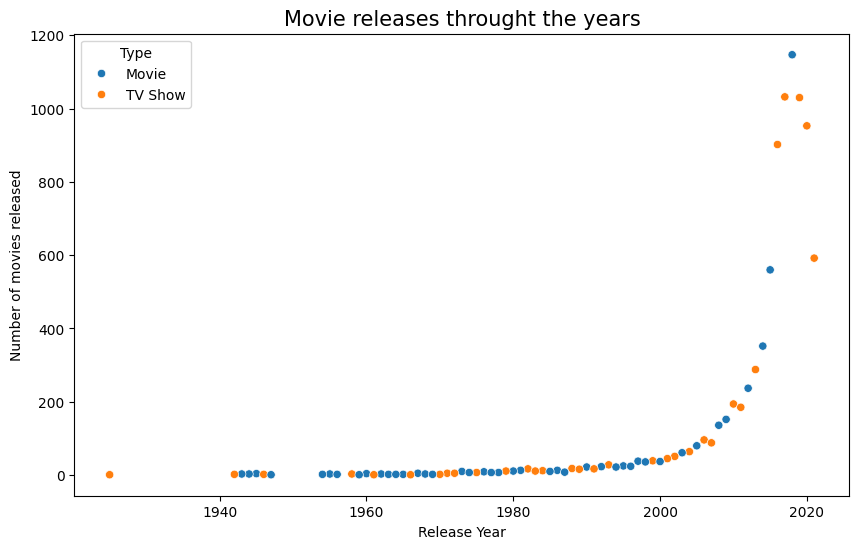

In [44]:
plt.figure(figsize= (10,6))
sns.scatterplot(data= year_df, x= 'release_year', y= 'count', hue= 'Type')
plt.title('Movie releases throught the years', fontsize= 15)
plt.xlabel('Release Year', fontsize = 10)
plt.ylabel('Number of movies released', fontsize= 10)
plt.show()

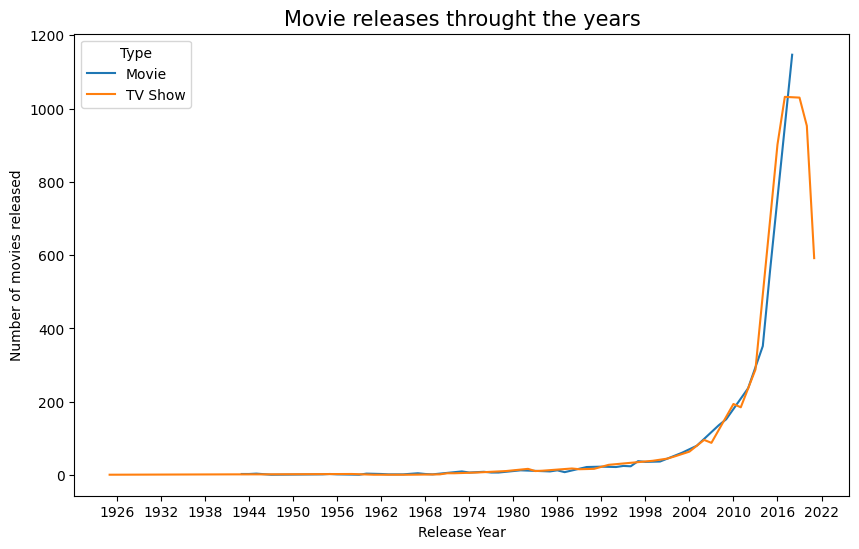

In [61]:
plt.figure(figsize= (10,6))
ax = sns.lineplot(data= year_df, x= 'release_year', y= 'count', hue= 'Type')
plt.title('Movie releases throught the years', fontsize= 15)
plt.xlabel('Release Year', fontsize = 10)
plt.ylabel('Number of movies released', fontsize= 10)
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
#plt.xticks(np.linspace(year_df['release_year'].min(), year_df['release_year'].max(), 16), rotation= 'vertical')
plt.show()

In [69]:
movie_show = netflix_df.type.value_counts().reset_index()
movie_show

,type,count
0,Movie,6131
1,TV Show,2676


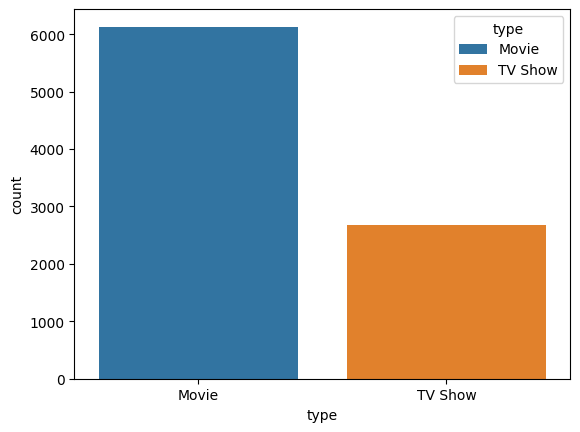

In [72]:
sns.countplot(data= netflix_df, x= 'type', hue= 'type', legend=True)
plt.show()